In [56]:
# IMPORTANT: 
# Download the dataset from the following link:
# https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification


# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Read and process data

cards = pd.read_csv('cards.csv')

img = Image.open(cards.filepaths[0])
# Deep NN Technique
img = img.resize((200,200))
cardarr = np.asarray(img)
cardarr.shape

def img_process(path):
    img = Image.open(path).resize((100,100)).convert('L')
    cardlist = np.asarray(img).flatten().tolist()    
#     # Deep NN Technique
#     img = Image.open(path).resize((20,20))
#     cardlist = np.asarray(img)
    return cardlist

cardd = cards['filepaths'].apply(img_process)
ft = pd.DataFrame(cardd.tolist())
all_data = pd.concat([cards,ft],axis=1)
all_data.drop(['filepaths','labels','class index'], inplace=True, axis=1)

In [58]:
# Split data into training and testing
# Split label from data

train_data = all_data[all_data['data set'] == 'train']
test_data = all_data[all_data['data set'] == 'test']
valid_data = all_data[all_data['data set'] == 'valid']

train_data.drop(['data set'], axis=1, inplace=True)
test_data.drop(['data set'], axis=1, inplace=True)
valid_data.drop(['data set'], axis=1, inplace=True)

y_train = train_data['card type']
X_train = train_data.drop(['card type'],axis=1)

y_test = test_data['card type']
X_test = test_data.drop(['card type'],axis=1)

y_valid = valid_data['card type']
X_valid = valid_data.drop(['card type'],axis=1)

C:\Users\alexb\AppData\Local\Temp\ipykernel_25312\3128637490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['data set'], axis=1, inplace=True)
C:\Users\alexb\AppData\Local\Temp\ipykernel_25312\3128637490.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['data set'], axis=1, inplace=True)
C:\Users\alexb\AppData\Local\Temp\ipykernel_25312\3128637490.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [59]:
# Try K Nearest Neighbors classifier with 15 neighbors

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  2  1  0  0  1  0  4  1  1  0  0  0]
 [ 2  0 16  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  2  2 15  0  0  0  0  0  1  0  0  0  0]
 [ 4  1  0  0 13  2  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  4 10  0  2  0  0  0  0  0  0]
 [ 1  0  1  0  1  1 11  0  1  0  3  0  1  0]
 [ 0  0  0  0  2  0  0 15  0  1  0  0  1  1]
 [ 1  2  1  2  0  0  1  0 12  1  0  0  0  0]
 [ 3  2  2  1  0  0  0  0  2 10  0  0  0  0]
 [ 1  0  1  1  0  0  3  1  1  0 12  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0 15  1  0]
 [ 5  1  0  0  0  0  0  0  1  0  0  0 13  0]
 [ 4  0  1  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         ace       0.41      1.00      0.58        20
       eight       0.56      0.50      0.53        20
        five       0.62      0.80      0.70        20
        four       0.71      0.75      0.73        20
        jack       0.65      0.65      0.65        20
        king       0.77      0.50      0.61 

Text(0, 0.5, 'Error Rate')

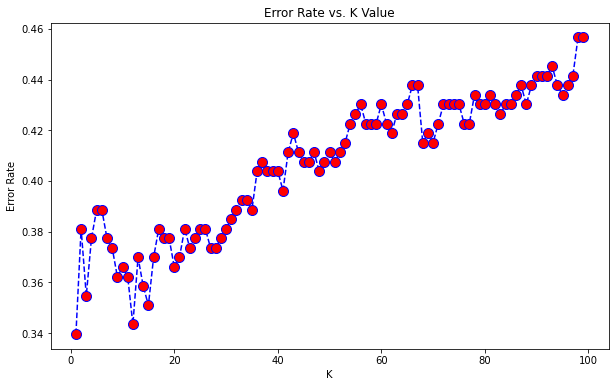

In [60]:
# Try K Nearest Neighbors classifier with neighbors between 1 and 100
# Look to see if it approaches a minimum

error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
# Try a Decision Tree classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)

print('Decision Tree Classifier Results:\n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Decision Tree Classifier Results:

[[14  3  0  0  1  1  0  0  1  0  0  0  0  0]
 [ 0 12  0  1  1  1  1  0  1  2  0  0  1  0]
 [ 2  1 12  0  0  0  2  1  0  0  0  0  2  0]
 [ 0  1  0 15  0  1  1  1  0  1  0  0  0  0]
 [ 0  0  2  1  5  4  1  3  1  2  0  1  0  0]
 [ 0  0  0  1  6  5  1  3  0  1  2  0  0  1]
 [ 0  0  1  0  0  0 11  2  0  1  2  3  0  0]
 [ 1  1  0  1  3  3  0  6  0  1  1  2  1  0]
 [ 0  0  0  2  0  0  0  1 13  2  1  0  1  0]
 [ 0  1  0  1  1  0  0  0  0 15  2  0  0  0]
 [ 0  0  0  2  0  0  1  0  0  1 12  1  3  0]
 [ 0  0  2  1  0  0  0  0  1  2  0 12  2  0]
 [ 2  0  0  1  0  0  1  0  1  1  1  0 13  0]
 [ 0  0  0  0  1  0  0  0  1  2  0  0  0  1]]
              precision    recall  f1-score   support

         ace       0.74      0.70      0.72        20
       eight       0.63      0.60      0.62        20
        five       0.71      0.60      0.65        20
        four       0.58      0.75      0.65        20
        jack       0.28      0.25      0.26        20
        k

In [62]:
#Try a Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

print('Random Forest Classifier Results:\n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Random Forest Classifier Results:

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 1  1 16  0  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  1 18  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0 17  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  6 14  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0 15  1  0  1  1  0  0  0]
 [ 0  1  0  0  3  1  0 15  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0 16  2  0  0  0  0]
 [ 2  0  0  1  1  0  0  0  0 15  0  0  1  0]
 [ 0  1  0  2  1  0  1  0  0  0 15  0  0  0]
 [ 1  0  0  0  0  1  0  0  0  0  0 18  0  0]
 [ 2  1  0  1  0  0  0  1  0  0  0  1 14  0]
 [ 2  0  0  0  3  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         ace       0.67      1.00      0.80        20
       eight       0.81      0.85      0.83        20
        five       0.94      0.80      0.86        20
        four       0.72      0.90      0.80        20
        jack       0.53      0.85      0.65        20
        k

C:\Users\alexb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Random Forest was the best classifier
# Let's look at the performance on the validation data set

print('Random Forest Classifier Results on validation data:\n')

pred = rfc.predict(X_valid)
print(confusion_matrix(y_valid, pred))
print(classification_report(y_valid, pred))

Random Forest Classifier Results on validation data:

[[16  0  2  0  0  1  0  0  0  0  1  0  0  0]
 [ 0 17  0  0  1  0  0  0  1  1  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  1  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  5 13  0  2  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0 16  0  0  0  0  0  0]
 [ 1  0  1  1  1  0  0  0 15  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1 17  0  1  0  0]
 [ 0  0  1  1  0  1  0  1  0  1 15  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 1  0  0  1  1  0  0  1  0  0  0  0 16  0]
 [ 0  0  0  0  0  3  0  0  1  0  0  0  0  1]]
              precision    recall  f1-score   support

         ace       0.76      0.80      0.78        20
       eight       1.00      0.85      0.92        20
        five       0.83      1.00      0.91        20
        four       0.78      0.90      0.84        20
        jack       0.59      0.85      0.69 